### Importación de librerías
Importa todas las librerías necesarias para el procesamiento de datos, visualización, creación y evaluación de modelos de machine learning, y almacenamiento de modelos.

In [43]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

import joblib
from joblib import load


### Carga de datos
Carga el archivo CSV con los datos procesados y muestra las primeras cinco filas del DataFrame para verificar su contenido.

In [44]:
df = pd.read_csv("C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/datos_procesados.csv")
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level,Happiness Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto,feliz
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto,feliz
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto,feliz
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto,feliz
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto,feliz


### Inspección de columnas
Muestra todas las columnas del DataFrame para identificar las variables disponibles y facilitar el análisis posterior.

In [45]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption_Perception', 'Generosity', 'Dystopia_Residual', 'Year',
       'Cluster', 'Happiness_Level', 'Happiness Category'],
      dtype='object')

## Preprocesamiento

### Eliminación de columnas innecesarias
Elimina columnas que no son relevantes para el modelo, como identificadores, rangos y columnas relacionadas con errores o intervalos de confianza, ignorando posibles errores si las columnas no existen.

In [46]:
columns_to_drop = [
    'Happiness_Rank', 'Standard_Error', 'Lower_Confidence_Interval',
    'Upper_Confidence_Interval', 'Whisker_High', 'Whisker_Low',
     'Year', 'Dystopia_Residual','Happiness Category','Happiness_Level','Cluster','Region'
]

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')


### Visualización de datos limpios
Muestra las primeras cinco filas del DataFrame limpio tras la eliminación de columnas innecesarias para verificar los cambios.

In [47]:
df_cleaned.head()

,Country,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### Inspección de datos limpios
Muestra información detallada del DataFrame `df_cleaned`, incluyendo el número de entradas, columnas, tipos de datos y la presencia de valores nulos, para verificar la estructura y calidad de los datos tras el preprocesamiento.

In [48]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                782 non-null    object 
 1   Happiness_Score        782 non-null    float64
 2   GDP_per_Capita         782 non-null    float64
 3   Social_Support         782 non-null    float64
 4   Life_Expectancy        782 non-null    float64
 5   Freedom                782 non-null    float64
 6   Corruption_Perception  782 non-null    float64
 7   Generosity             782 non-null    float64
dtypes: float64(7), object(1)
memory usage: 49.0+ KB


### Verificación de valores nulos
Muestra la cantidad de valores nulos en cada columna del DataFrame `df_cleaned` para confirmar que los datos están completos después de las operaciones de limpieza.

In [49]:
df_cleaned.isnull().sum()

Country                  0
Happiness_Score          0
GDP_per_Capita           0
Social_Support           0
Life_Expectancy          0
Freedom                  0
Corruption_Perception    0
Generosity               0
dtype: int64

### Codificación de variables categóricas
Aplica codificación (como LabelEncoder o One-Hot Encoding) a las columnas categóricas (`Region`, `Happiness_Level`, `Happiness Category`) para preparar los datos para el modelo.
### Selección de características
Define las variables independientes (X) seleccionando las columnas relevantes del DataFrame limpio y la variable dependiente (y) como `Happiness_Score`.

In [50]:
# Variables predictoras y objetivo
X = df_cleaned.drop(columns=['Happiness_Score',])
y = df_cleaned['Happiness_Score']

# Codificar variables categóricas si existen (por ejemplo, 'Region')
X = pd.get_dummies(X, drop_first=True)


### División de datos en entrenamiento y prueba
Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando `train_test_split` para evaluar el rendimiento del modelo.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_test.shape

(157, 175)

In [53]:
X_train.shape

(625, 175)

In [54]:
X_train.columns

Index(['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption_Perception', 'Generosity', 'Country_Albania',
       'Country_Algeria', 'Country_Angola', 'Country_Argentina',
       ...
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Yemen',
       'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=175)

### Entrenamiento y evaluación de modelos


# Linear Regression

| **Métrica**                                   | **Valor** | **Interpretación**                                                                                                 |
| --------------------------------------------- | --------- | ------------------------------------------------------------------------------------------------------------------ |
| **Mean Squared Error (MSE)** *(con `X_test`)* | `0.0723`  | Error cuadrático medio en el conjunto de prueba. Cuanto más bajo, mejor.                                           |
| **R² Score** *(con `X_test`)*                 | `0.9406`  | El modelo explica el 94.1% de la varianza en el conjunto de prueba. Muy buen ajuste.                               |
| **R² global (`cross_val_predict`)**           | `0.8583`  | Porcentaje de varianza explicada usando predicciones cruzadas. Evaluación más realista de la capacidad predictiva. |
| **MAE (`cross_val_predict`)**                 | `0.2485`  | Error absoluto medio. En promedio, el modelo se equivoca en ±0.25 unidades.                                        |
| **R² promedio (`cross_val_score`)**           | `0.8527`  | Promedio de R² en validación cruzada. Muy cercano al R² global, lo que indica estabilidad.                         |
| **Desviación estándar de R²**                 | `0.0598`  | Variabilidad del R² entre particiones. Un poco alta comparado con otros modelos como Random Forest.                |


In [ ]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_model = linear_model.predict(X_test)
print("Linear Regression:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_linear_model))
print("R²: ", r2_score(y_test, y_pred_linear_model))

print()

Linear Regression:
Mean Squared Error:  0.07227450723099678
R²:  0.9405822086017924



In [66]:
# Para R²
r2_scores = cross_val_score(linear_model , X_train, y_train, cv=5, scoring='r2')
y_pred_cv = cross_val_predict(linear_model , X_train, y_train, cv=5)
print("R² global desde cross_val_predict:", r2_score(y_train, y_pred_cv))
print("MAE desde cross_val_predict:", mean_absolute_error(y_train, y_pred_cv))
print("R² promedio (validación cruzada):", np.mean(r2_scores))
print("Desviación estándar R²:", np.std(r2_scores))

R² global desde cross_val_predict: 0.8583190118314823
MAE desde cross_val_predict: 0.24849941373552656
R² promedio (validación cruzada): 0.8527135534058846
Desviación estándar R²: 0.05977612777164632


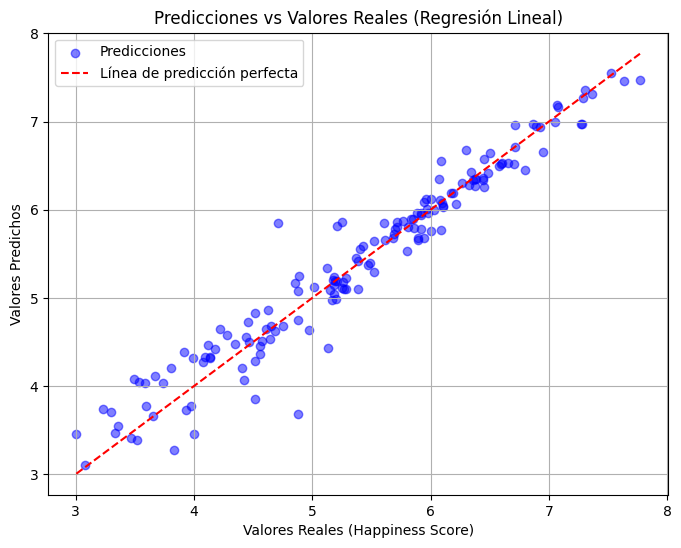

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear_model, color='blue', alpha=0.5, label='Predicciones')  # Corregido: coma agregada
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de predicción perfecta')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales (Happiness Score)')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

# Ridge Regression

| **Métrica**                                   | **Valor** | **Interpretación**                                                                                          |
| --------------------------------------------- | --------- | ----------------------------------------------------------------------------------------------------------- |
| **Mean Squared Error (MSE)** *(con `X_test`)* | `0.0996`  | Error cuadrático medio. Un poco más alto que en Linear Regression, pero aún aceptable.                      |
| **R² Score** *(con `X_test`)*                 | `0.9181`  | El modelo explica el 91.8% de la varianza en el conjunto de prueba. Muy buen ajuste.                        |
| **R² global (`cross_val_predict`)**           | `0.9098`  | Muy alto. Indica excelente capacidad predictiva usando validación cruzada.                                  |
| **MAE (`cross_val_predict`)**                 | `0.2559`  | Error absoluto medio. El modelo se equivoca en promedio por ±0.26 unidades.                                 |
| **R² promedio (`cross_val_score`)**           | `0.9087`  | Valor muy cercano al R² global. Excelente consistencia entre folds.                                         |
| **Desviación estándar de R²**                 | `0.0092`  | Muy baja. El modelo es **altamente estable y consistente** en diferentes particiones del conjunto de datos. |


In [ ]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_ridge))
print("R²: ", r2_score(y_test, y_pred_ridge))
print()

Ridge Regression:
Mean Squared Error:  0.09959029931384861
R²:  0.9181255485976185



In [62]:
# Para R²
r2_scores = cross_val_score(ridge_model , X_train, y_train, cv=5, scoring='r2')
y_pred_cv = cross_val_predict(ridge_model  , X_train, y_train, cv=5)
print("R² global desde cross_val_predict:", r2_score(y_train, y_pred_cv))
print("MAE desde cross_val_predict:", mean_absolute_error(y_train, y_pred_cv))
print("R² promedio (validación cruzada):", np.mean(r2_scores))
print("Desviación estándar R²:", np.std(r2_scores))

R² global desde cross_val_predict: 0.9097978077913546
MAE desde cross_val_predict: 0.2559319287837503
R² promedio (validación cruzada): 0.9086808117463463
Desviación estándar R²: 0.009234811638426016


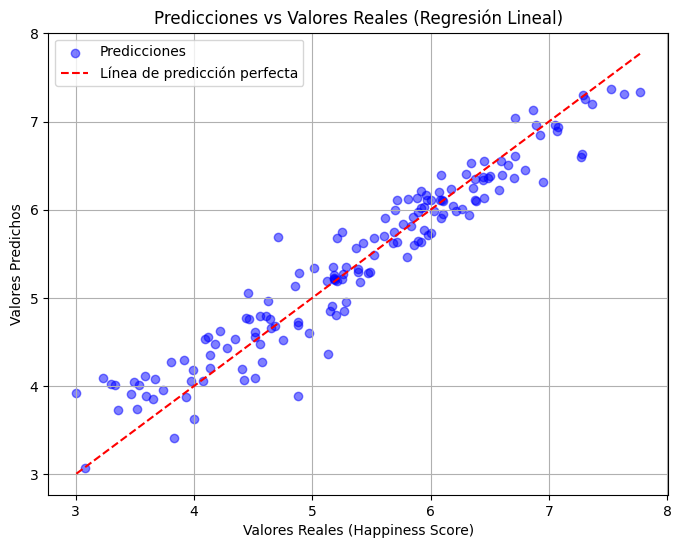

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5, label='Predicciones')  # Corregido: coma agregada
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de predicción perfecta')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales (Happiness Score)')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest

| **Métrica**                                   | **Valor** | **Interpretación**                                                                                                         |
| --------------------------------------------- | --------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Mean Squared Error (MSE)** *(con `X_test`)* | `0.2033`  | Error cuadrático medio más alto que los modelos lineales. Menor precisión en los valores predichos.                        |
| **R² Score** *(con `X_test`)*                 | `0.8329`  | El modelo explica el 83.3% de la varianza. Correcto, pero menor que los modelos lineales.                                  |
| **R² global (`cross_val_predict`)**           | `0.8295`  | Indica que el modelo mantiene una capacidad de predicción razonable, aunque menor que Ridge o Linear.                      |
| **MAE (`cross_val_predict`)**                 | `0.3541`  | Error absoluto medio. El más alto de los tres modelos. Menor precisión en predicciones individuales.                       |
| **R² promedio (`cross_val_score`)**           | `0.8258`  | Valor aceptable, pero el menor entre los modelos comparados.                                                               |
| **Desviación estándar de R²**                 | `0.0295`  | Variabilidad moderada. Mayor que en Ridge, menor que en Linear. El modelo no es el más estable, pero tampoco es inestable. |


In [ ]:

ranf_model = RandomForestRegressor(random_state=42)
ranf_model.fit(X_train, y_train)
y_pred_ranf_model = ranf_model.predict(X_test)
print("Random Forest:")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_ranf_model))
print("R²: ", r2_score(y_test, y_pred_ranf_model))
print()

Random Forest:
Mean Squared Error:  0.20330895526193413
R²:  0.8328571227122773



In [ ]:
# Para R²
r2_scores = cross_val_score(ranf_model, X_train, y_train, cv=5, scoring='r2')
y_pred_cv = cross_val_predict(ranf_model , X_train, y_train, cv=5)
print("R² global desde cross_val_predict:", r2_score(y_train, y_pred_cv))
print("MAE desde cross_val_predict:", mean_absolute_error(y_train, y_pred_cv))
print("R² promedio (validación cruzada):", np.mean(r2_scores))
print("Desviación estándar R²:", np.std(r2_scores))

R² global desde cross_val_predict: 0.8294530043231776
MAE desde cross_val_predict: 0.3540935986310813
R² promedio (validación cruzada): 0.8257704641228367
Desviación estándar R²: 0.02948611981005384


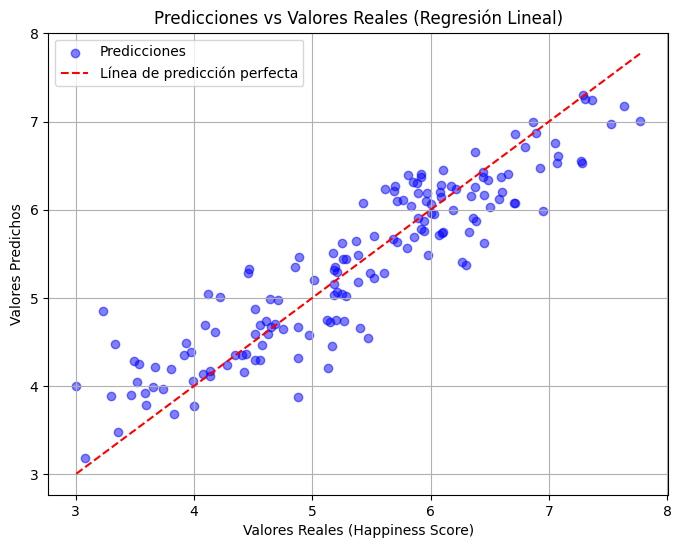

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ranf_model, color='blue', alpha=0.5, label='Predicciones')  # Corregido: coma agregada
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de predicción perfecta')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales (Happiness Score)')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()

## escoger modelo 

| **Métrica**                         | **Linear Regression** | **Ridge Regression** | **Random Forest** |
| ----------------------------------- | --------------------- | -------------------- | ----------------- |
| **MSE (X\_test)**                   | 0.0723                | 0.0996               | 0.2033            |
| **R² (X\_test)**                    | 0.9406                | 0.9181               | 0.8329            |
| **R² global (cross\_val\_predict)** | 0.8583                | **0.9098**           | 0.8295            |
| **MAE (cross\_val\_predict)**       | **0.2485**            | 0.2559               | 0.3541            |
| **R² promedio (cross\_val\_score)** | 0.8527                | **0.9087**           | 0.8258            |
| **Desv. estándar R²**               | 0.0598                | **0.0092**           | 0.0295            |



### 🔍 **Análisis Comparativo**

#### 🟢 **1. Ridge Regression** *(Mejor rendimiento general)*

* **Mayor capacidad predictiva** global (`R² ≈ 0.91`) y en validación cruzada.
* **Más consistente**: menor desviación estándar entre folds.
* Buen compromiso entre precisión, robustez y regularización.
* Ideal si hay multicolinealidad o si se quiere evitar sobreajuste.

#### 🟡 **2. Linear Regression**

* **Excelente rendimiento en prueba (`R² ≈ 0.94`)**, pero menos estable en validación cruzada.
* **Mejor MAE**, por lo tanto, más preciso en errores individuales.
* Menor robustez que Ridge ante particiones de datos diferentes.

#### 🔴 **3. Random Forest**

* **Peor desempeño global** en todas las métricas.
* MAE y MSE más altos, menor `R²`, tanto en prueba como en validación cruzada.
* A pesar de su capacidad para modelar no linealidades, **no aporta beneficios en este caso**.

---

### 🏁 **Conclusión Final**

*Se eligio el  Ridge Regression por precisión y estabilidad general.


### 🧮 Distribución de Errores

Este histograma muestra los errores (residuos) del modelo.  
Un buen modelo debería tener errores centrados cerca de 0 y una forma simétrica, lo que indica que no hay sesgo sistemático.


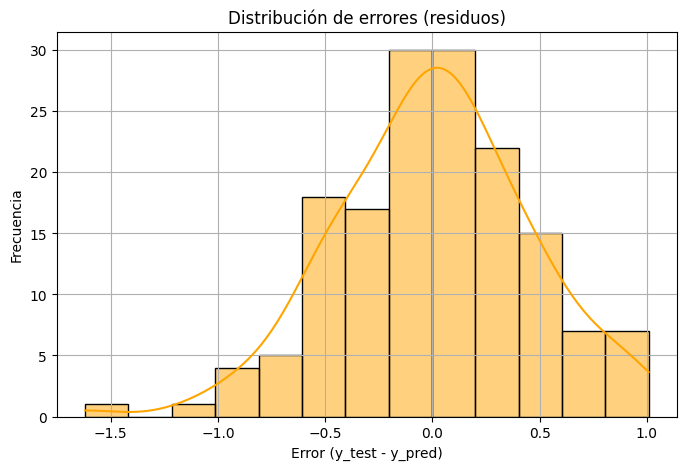

In [68]:
errors = y_test - y_pred_ranf_model

plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='orange')
plt.title('Distribución de errores (residuos)')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### Guardado del modelo
Guarda el modelo entrenado en un archivo utilizando `pickle` o `joblib` para su uso futuro.

In [ ]:
# Directorio de salida
output_dir = r"C:\Users\Acer\OneDrive\Escritorio\Workshops y Proyectos\workshop3\modelo"
os.makedirs(output_dir, exist_ok=True)

# Ruta de guardado
model_path = os.path.join(output_dir, "ridge_model.pkl")

# Guardar modelo y columnas en un diccionario
objeto_modelo = {
    "modelo": ranf_model,  # Asegúrate de que ranf_model esté entrenado
    "features": list(X_train.columns)
}

joblib.dump(objeto_modelo, model_path)


['C:\\Users\\Acer\\OneDrive\\Escritorio\\Workshops y Proyectos\\workshop3\\modelo\\ridge_model.pkl']